In [3]:
# importando módulos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
import torchvision
import torchvision.transforms as transforms
from torch.autograd.grad_mode import no_grad

In [6]:
# Criando a Objeto da Rede Convolucional e sua arquitetura
class LeNet1(nn.Module):
    def __init__(self):
        super(LeNet1, self).__init__()

        model_list = [
            nn.Conv2d(in_channels=1, out_channels=4,kernel_size=5),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(in_channels=4,out_channels=12,kernel_size=5),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2)
        ]

        self.model = nn.Sequential(*model_list)
        self.fc = nn.Linear(12*4*4, 10)
        self.criterion = nn.CrossEntropyLoss()

    def forward(self, x):
        out = self.model(x)
        out = out.view(x.size(0), -1)
        out = self.fc(out)
        return out


In [8]:
net = LeNet1()
params_num = 0
for param in net.parameters():
    print(param.size())
    print(param.view((-1)).size())
    print()
    params_num += list(param.view((-1)).size())[0]

print("Total Params number: {}".format(params_num))


In [9]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

full_train_set = torchvision.datasets.MNIST(root = "./data", train = True, download = True, transform=transform)
test_set = torchvision.datasets.MNIST(root = "./data", train = False, download = True, transform=transform)

val_set, train_set = torch.utils.data.random_split(full_train_set, (10000, len(full_train_set) - 10000))
mini_train_set, mini_val_set = torch.utils.data.random_split(full_train_set, (100, len(full_train_set) - 100))
mini_val_set = torch.utils.data.Subset(mini_val_set, np.arange(0, 20))

In [10]:
%reload_ext autoreload
%autoreload 2

from src.solver import Solver
import torch.optim as optim

learning_rate = 0.01

net = LeNet1()
optimizer = optim.SGD(net.parameters(), lr=learning_rate)

options = {
    "train_data_loader": {
        "shuffle": True,
        "batch_size": 16,
        "num_workers": 4
    },
    "val_data_loader": {
        "shuffle": True,
        "batch_size": 16,
        "num_workers": 4
    },
    "back_up_model_every": 100,
    "epochs": 20
}

solver = Solver(net, mini_train_set, mini_val_set, **options)
solver.train(optimizer)

Training for 20 epochs
Epoch[0]  train_loss=2.287179027284895  val_loss=2.2687705755233765
Epoch[1]  train_loss=2.255427496773856  val_loss=2.278905153274536
Epoch[2]  train_loss=2.2263423034123013  val_loss=2.2534302473068237
Epoch[3]  train_loss=2.196058988571167  val_loss=2.197440505027771
Epoch[4]  train_loss=2.164327791758946  val_loss=2.261840343475342
Epoch[5]  train_loss=2.142519950866699  val_loss=2.2258745431900024
Epoch[6]  train_loss=2.129819256918771  val_loss=2.122480034828186
Epoch[7]  train_loss=2.0698517050061906  val_loss=2.087198853492737
Epoch[8]  train_loss=2.040121521268572  val_loss=2.143814206123352
Epoch[9]  train_loss=1.9967608451843262  val_loss=2.082154393196106
Epoch[10]  train_loss=1.962412987436567  val_loss=2.108864188194275
Epoch[11]  train_loss=1.931881615093776  val_loss=2.101121723651886
Epoch[12]  train_loss=1.9019452844347273  val_loss=1.8642157316207886
Epoch[13]  train_loss=1.907056416784014  val_loss=1.8576701879501343
Epoch[14]  train_loss=1.82

In [11]:
def box_smooth(data, length):
    box = np.ones(length)/length
    smooth_data = np.convolve(data, box, mode="same")
    return smooth_data

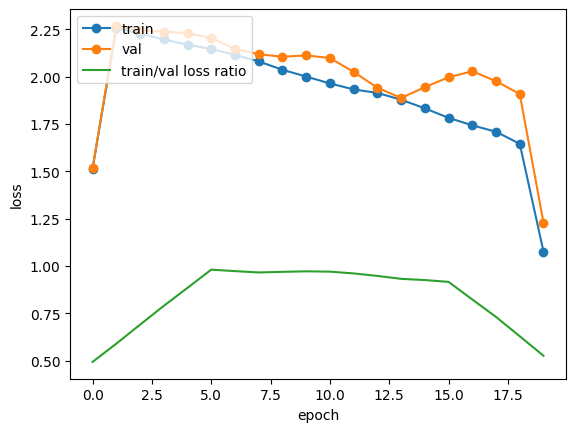

In [12]:
train_val_loss_ratio = torch.div(torch.tensor(solver.train_loss_history), torch.tensor(solver.val_loss_history))

sma_len = 3

plt.plot(box_smooth(solver.train_loss_history, sma_len), '-o')
plt.plot(box_smooth(solver.val_loss_history, sma_len), '-o')
plt.plot(box_smooth(train_val_loss_ratio, 10))
plt.legend(['train', 'val', 'train/val loss ratio'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [15]:
%load_ext autoreload
%autoreload 2

from src.solver import Solver

learning_rate = 0.01
LeNet1Model = LeNet1()
optimizer = optim.SGD(LeNet1Model.parameters(), lr=learning_rate)
options = {
    "train_data_loader": {
        "shuffle": True,
        "batch_size": 64,
        "num_workers": 3
    },
    "val_data_loader": {
        "shuffle": True,
        "batch_size": 64,
        "num_workers": 3
    },
    "back_up_model_every": 50,
    "epochs": 10
}

solver = Solver(LeNet1Model, train_set, val_set, **options)
solver.train(optimizer)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Training for 10 epochs
Epoch[0]  train_loss=1.197588896964822  val_loss=0.5883481437992898
Epoch[1]  train_loss=0.49449120858288786  val_loss=0.4298393210977506
Epoch[2]  train_loss=0.40006905289181055  val_loss=0.37406615447846187
Epoch[3]  train_loss=0.35288895892403316  val_loss=0.33569472468203043
Epoch[4]  train_loss=0.3221915750800039  val_loss=0.3101173138162892
Epoch[5]  train_loss=0.29903443931313733  val_loss=0.28917605671913
Epoch[6]  train_loss=0.27982253224000603  val_loss=0.2723030528160417
Epoch[7]  train_loss=0.2636610128633354  val_loss=0.25918666221153963
Epoch[8]  train_loss=0.24979265358137048  val_loss=0.24579560761428942
Epoch[9]  train_loss=0.23782784972921053  val_loss=0.2351644114134418
Done training. Train Accuracy = 0.93412. Val accuracy = 0.9329


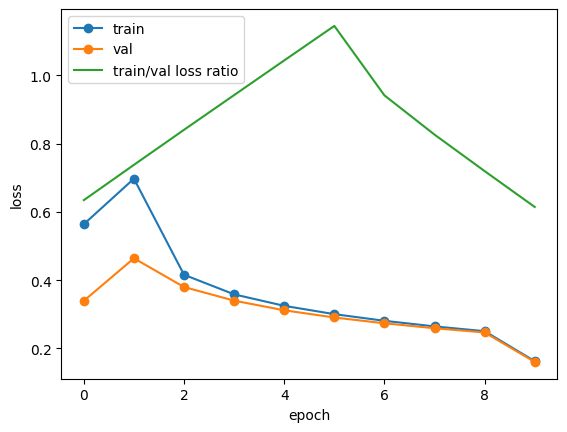

In [16]:
train_val_loss_ratio = torch.div(torch.tensor(solver.train_loss_history), torch.tensor(solver.val_loss_history))

sma_len = 3

plt.plot(box_smooth(solver.train_loss_history, sma_len), '-o')
plt.plot(box_smooth(solver.val_loss_history, sma_len), '-o')
plt.plot(box_smooth(train_val_loss_ratio, 10))
plt.legend(['train', 'val', 'train/val loss ratio'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [18]:
chkpt = torch.load("./backups/0.01_100_200.pth")

loader_opts = {
    "batch_size": 64,
    "num_workers": 6
}
final_loader = torch.utils.data.DataLoader(dataset = test_set, **loader_opts)

final_model = LeNet1()
final_model.load_state_dict(chkpt["model_state"])
final_model.eval()

train_acc = -1
with torch.no_grad():
    correct = 0
    total = 0

    for (inputs, labels) in final_loader:
        out = final_model(inputs)
        predicted = torch.argmax(out.data, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

final_acc = correct / total

print("Trained model prediction accuracy: {}%".format(final_acc * 100))

Trained model prediction accuracy: 76.38000000000001%
